# Which Star Wars Film is the Best?
- I clean and analyze data from FiveThirtyEight. The data comes from a SurveyMonkey survey done by FiveThirtyEight with 835 respondents. 
- The survey was done before Episode VII: The Force Awakens was released. 
- I segment the survey population into various groups in order to see how they rank the Star Wars films. In particular, I look at the difference between male and female respondents, Star Wars fans and non-fans, and Star Trek fans and non-fans. 

In [1]:
import pandas as pd
star_wars = pd.read_csv('star_wars.csv', encoding='ISO-8859-1')
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [2]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

## Remove rows where the respondentID is null.

In [3]:
star_wars = star_wars[star_wars['RespondentID'].notnull()]
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
10,3.292640e+09,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,

## Covert 2nd and 3rd columns to Boolean type.

In [4]:
yes_no = {"Yes":True, "No":False}
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

## Covert columns 3 to 8 (4th to 9th columns) to Boolean type and rename them.

In [5]:
import numpy as np
episode_one = {'Star Wars: Episode I  The Phantom Menace':True, np.NaN:False}
episode_two = {'Star Wars: Episode II  Attack of the Clones':True, np.NaN:False}
episode_three = {'Star Wars: Episode III  Revenge of the Sith':True, np.NaN:False}
episode_four = {'Star Wars: Episode IV  A New Hope':True, np.NaN:False}
episode_five = {'Star Wars: Episode V The Empire Strikes Back':True, np.NaN:False}
episode_six = {'Star Wars: Episode VI Return of the Jedi':True, np.NaN:False}

star_wars['Which of the following Star Wars films have you seen? Please select all that apply.'] = star_wars['Which of the following Star Wars films have you seen? Please select all that apply.'].map(episode_one)
star_wars['Unnamed: 4'] = star_wars['Unnamed: 4'].map(episode_two)
star_wars['Unnamed: 5'] = star_wars['Unnamed: 5'].map(episode_three)
star_wars['Unnamed: 6'] = star_wars['Unnamed: 6'].map(episode_four)
star_wars['Unnamed: 7'] = star_wars['Unnamed: 7'].map(episode_five)
star_wars['Unnamed: 8'] = star_wars['Unnamed: 8'].map(episode_six)

In [6]:
star_wars = star_wars.rename(columns={"Which of the following Star Wars films have you seen? Please select all that apply.":"seen_1"})
star_wars = star_wars.rename(columns={"Unnamed: 4":"seen_2"})
star_wars = star_wars.rename(columns={"Unnamed: 5":"seen_3"})
star_wars = star_wars.rename(columns={"Unnamed: 6":"seen_4"})
star_wars = star_wars.rename(columns={"Unnamed: 7":"seen_5"})
star_wars = star_wars.rename(columns={"Unnamed: 8":"seen_6"})

## Rename columns 9 to 14.

In [7]:
star_wars.columns[9:15]

Index(['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14'],
      dtype='object')

In [8]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
star_wars = star_wars.rename(columns={'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'ranking_1'})
star_wars = star_wars.rename(columns={'Unnamed: 10':'ranking_2'})
star_wars = star_wars.rename(columns={'Unnamed: 11':'ranking_3'})
star_wars = star_wars.rename(columns={'Unnamed: 12':'ranking_4'})
star_wars = star_wars.rename(columns={'Unnamed: 13':'ranking_5'})
star_wars = star_wars.rename(columns={'Unnamed: 14':'ranking_6'})

## Mean Ratings of Star Wars Films
- Films were ranked from most liked (1) to least liked (6).
- So the films with the lowest mean value were the most liked.

In [9]:
means = []
cols = ['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6']
for c in cols:
    col_mean = star_wars[c].mean()
    c = col_mean
    means.append(c)
means

[3.7329341317365268,
 4.087320574162679,
 4.341317365269461,
 3.272727272727273,
 2.513157894736842,
 3.047846889952153]

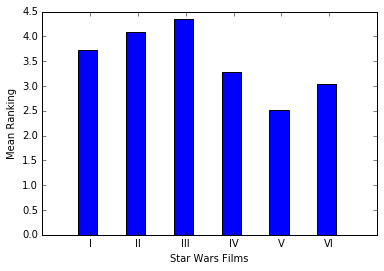

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
labels = ['', 'I', 'II', 'III', 'IV', 'V', 'VI']
bar_positions = np.arange(6) + 0.75
fig, ax = plt.subplots()
mean_ratings = ax.bar(bar_positions, means, 0.4)
ax.set_ylabel('Mean Ranking')
ax.set_xlabel('Star Wars Films')
ax.set_xticklabels(labels)
plt.show()

## Findings:
- Episode V: The Empire Strikes Back is the clear favorite, with a mean score of 2.5.
- In general, the original trilology (episodes IV, V, & VI) scored better than the prequel trilogy films.
- Episode IV and Episode VI have similar scores, 3.2 and 3.0 respectively.
- Interestingly mean scores of the prequel trilogy films increase with each successive film. So Episode I scored better than Episode II, and Episode II scored better than Episode III. One explanation of this is that the movies got progressively disappointing as viewers realized that the prequels were not going to capture the nostalgia of the originals.

In [20]:
seen_columns = ['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6']
seen = star_wars[seen_columns].sum()
seen

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

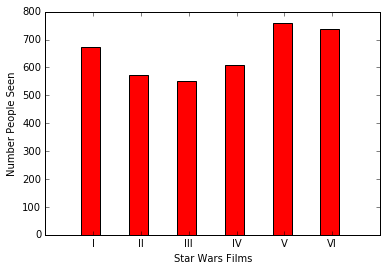

In [11]:
labels = ['', 'I', 'II', 'III', 'IV', 'V', 'VI']
bar_positions = np.arange(6) + 0.75
fig, ax = plt.subplots()
mean_ratings = ax.bar(bar_positions, seen, 0.4, color='r')
ax.set_ylabel('Number People Seen')
ax.set_xlabel('Star Wars Films')
ax.set_xticklabels(labels)
plt.show()

## Findings:
- The number of people who've seen the films is negatively correlated with the mean ranking. The higher the mean ranking (lower mean), the more views it has, and the lower the ranking (higher mean) the less times it is views.
- The exception to this relationship is Episode I. Episode one is ranked 4th but has the third highest number of views, beating out Episode IV. Episode I might have beat out Episode IV because of the excitement surrounding its release, since it was the first Star Wars film in 16 years. That combined with an established fan-base might explain the high number of views relative to his ranking.  
- One natural explanation of the general correlation is that higher-ranked films are generally liked more, and that better-liked films are seen by more people. Much of this might happen by word-of-mouth. Films that are liked more might be discussed more often or more favorably, which might cause more people to see them.
- But higher viewership might distort the rankings, since as more people see a film, there is more 'hype' surrounding the film. This 'hype-effect' might make people think more favorably about the film. 

# Population Segmented by Gender and Fan Status

In [40]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

fan = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == True]
not_fan = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == False]

trekkie = star_wars[star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'] == 'Yes']
not_trekkie = star_wars[star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'] == 'No']

## Ranking and Most-Viewed by Gender

In [16]:
female_means = []
cols = ['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6']
for c in cols:
    col_mean = females[c].mean()
    c = col_mean
    female_means.append(c)
female_means

[3.4292929292929295,
 3.954659949622166,
 4.418136020151134,
 3.544080604534005,
 2.5692695214105794,
 3.0780856423173804]

In [57]:
male_means = []
for c in cols:
    col_mean = males[c].mean()
    c = col_mean
    male_means.append(c)
male_means

[4.037825059101655,
 4.224586288416075,
 4.274881516587678,
 2.9976359338061465,
 2.458628841607565,
 3.0023640661938535]

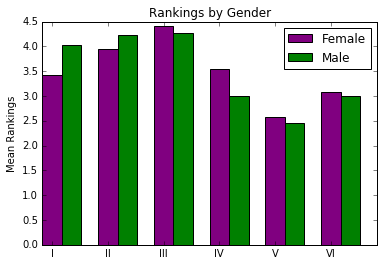

In [58]:
N = 6

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, female_means, width, color='purple')

rects2 = ax.bar(ind + width, male_means, width, color='green')

ax.legend((rects1[0], rects2[0]), ('Female', 'Male'))

ax.set_ylabel('Mean Rankings')
ax.set_title('Rankings by Gender')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('I', 'II', 'III', 'IV', 'V', 'VI'))

## Findings:
- Both mean and women ranked Episode V as the best and Episode III as the worst. Both also ranked Episode II as the second worst. They disagree on the other films.
- Male rankings (best to worst): V, IV, VI, I, II, III
- Female rankings: V, VI, I, IV, II, III
- Interestingly, females ranked I as third best and IV as fourth, whereas men ranked IV as second. Both agree that V adn VI are in the top two. 
- The average female rankings for the original trilogy films are lower (higher value) than the average male rankings. The difference with respect to Episode IV is significant, which is reflected in the overall female rankings.
- The average male rankings for Episodes I and II are lower (higher value) than those of the females. This is especially true for Episode I, which again is reflected in the female rankings.
- For men there is a clear preference for the original trilogy, whereas for women this does not appear to be the case. Perhaps this is because the originally trilogy focused on a heroic male figure, whereas the prequel focuses on a male who falls from grace to become evil. 

In [65]:
female_views = females[seen_columns].sum()
female_views

seen_1    298
seen_2    237
seen_3    222
seen_4    255
seen_5    353
seen_6    338
dtype: int64

In [66]:
male_views = males[seen_columns].sum()
male_views

seen_1    361
seen_2    323
seen_3    317
seen_4    342
seen_5    392
seen_6    387
dtype: int64

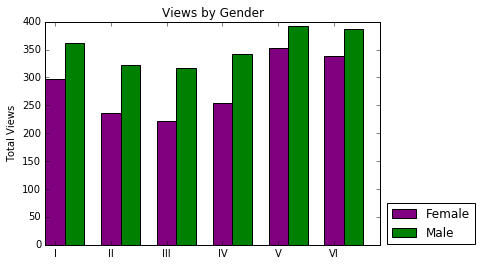

In [67]:
seen_columns = ['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6'] 

N = 6
ind = np.arange(N) # the x locations for the groups width = 0.35 # the width of the bars

fig, ax = plt.subplots() 
rects1 = ax.bar(ind, female_views, width, color='purple')
rects2 = ax.bar(ind + width, male_views, width, color='green')

ax.legend((rects1[0], rects2[0]), ('Female', 'Male'), bbox_to_anchor=(1.3, 0.215))
ax.set_ylabel('Total Views') 
ax.set_title('Views by Gender') 
ax.set_xticks(ind + width / 2) 
ax.set_xticklabels(('I', 'II', 'III', 'IV', 'V', 'VI'))

## Findings:
- The correlation seen in unsegmented population is repeated here. Mean ranking is negatively correlated with number of views. That is, the lower the ranking value (which corresponds to a "higher" ranking), the more times the film has been views. 
- Again, Episode I is the exception, having a higher number of views for both Males and Females than Episode IV despite being ranked lower than Episode IV.
- But men have a huch higher number of views than women, especially for Episodes I, II, and III.

## Ranking and Most-Viewed by Star Wars Fan Status

In [41]:
fan_means = []
cols = ['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6']
for c in cols:
    col_mean = fan[c].mean()
    c = col_mean
    fan_means.append(c)
fan_means

[4.141304347826087,
 4.342391304347826,
 4.417422867513611,
 2.9329710144927534,
 2.3333333333333335,
 2.829710144927536]

In [55]:
not_fan_means = []
for c in cols:
    col_mean = not_fan[c].mean()
    c = col_mean
    not_fan_means.append(c)
not_fan_means

[2.9363957597173145,
 3.591549295774648,
 4.193661971830986,
 3.933098591549296,
 2.862676056338028,
 3.471830985915493]

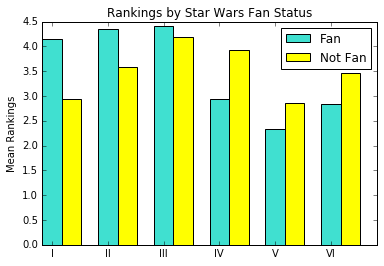

In [56]:
N = 6

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, fan_means, width, color='turquoise')

rects2 = ax.bar(ind + width, not_fan_means, width, color='yellow')

ax.legend((rects1[0], rects2[0]), ('Fan', 'Not Fan'))

ax.set_ylabel('Mean Rankings')
ax.set_title('Rankings by Star Wars Fan Status')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('I', 'II', 'III', 'IV', 'V', 'VI'))

## Findings:
- The overal rankings of Star Wars fans match the overall rankings of the original population. Star Wars fans ranked the films (from best to worst) as follows: V, VI, IV, I, II, III. For fans, there is a significant differnce between the average rankings for the original trilogy and the prequel trilogy. The original films are ranked much higher than the prequel films.
- Non-fans ranked the films differently as follows: V, I, VI, II, VI, III.
- Fans and non-fans agree that Episode V: The Empire Strikes Back is the best film and that Episode III: Revenge of the Sith is the worst film. 
- There is a noticeable overall difference between how much fans like the original trilogy and the prequels. 
- Also, for fans there was not a significant difference between the mean rankings of Episodes I, II, and III. For fans, they seemed to like all three roughly the same. But for non-fans, there are significant differences between them. This suggests that non-fans got progressively dissatisfied with the prequel films 

In [63]:
seen_columns = ['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6'] 
fan_views = fan[seen_columns].sum() 
fan_views

seen_1    500
seen_2    463
seen_3    450
seen_4    483
seen_5    538
seen_6    537
dtype: int64

In [64]:
non_fan_views = not_fan[seen_columns].sum()
non_fan_views

seen_1    173
seen_2    108
seen_3    100
seen_4    124
seen_5    220
seen_6    201
dtype: int64

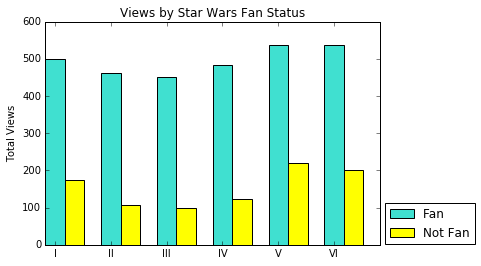

In [61]:
seen_columns = ['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6'] 
fan_views = fan[seen_columns].sum() 
non_fan_views = not_fan[seen_columns].sum()

N = 6
ind = np.arange(N) # the x locations for the groups width = 0.35 # the width of the bars

fig, ax = plt.subplots() 
rects1 = ax.bar(ind, fan_views, width, color='turquoise')
rects2 = ax.bar(ind + width, non_fan_views, width, color='yellow')

ax.legend((rects1[0], rects2[0]), ('Fan', 'Not Fan'), bbox_to_anchor=(1.3, 0.215))
ax.set_ylabel('Total Views') 
ax.set_title('Views by Star Wars Fan Status') 
ax.set_xticks(ind + width / 2) 
ax.set_xticklabels(('I', 'II', 'III', 'IV', 'V', 'VI'))

## Findings:
- Not unexepectedly, fan views are much higher than non-fan views. There appears to be about twice as many fan views as non-fan views for all of the films. 
- We see roughly the same correlation with overall rankings for both fans and non-fans. The films with the highest overall ranking for the entire population are watched the most, and the films with the lowest ranking are watched the least. Again, the exception is Episode I. 
- Interestingly, the difference in number of views between Episode I and II are much greater for non-fans than for fans. This suggests after the release of Episode I, non-fans lost some of their interst in the franchise. 